In [1]:
from miic3.trace_data.waveform import Store_Client
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import os

gfz = Client('GFZ')
gfz.set_eida_token('/home/pm/.eidatoken')
root = '/home/pm/Documents/PhD/testdata'
sc = Store_Client(gfz,root,read_only=False)
starttime = UTCDateTime(2015,8,1)
endtime = UTCDateTime(2015,8,5)
sc.download_waveforms_mdl(starttime,endtime,clients=[gfz], network='D0', station='*')

FDSNException: Bad request. If you think your request was valid please contact the developers.
Detailed response of server:

Error 400: Bad Request
token is expired
Usage details are available from /fdsnws/dataselect/1/
Request:
/fdsnws/dataselect/1/auth
Request Submitted:
2021-05-11T13:07:35.37769
Service Version:
1.1.0

In [3]:
# Try to read in the files written in the section above
sc.read_only=True
st = sc.get_waveforms('D0', 'BDR', '*', '*', UTCDateTime(0), UTCDateTime(2100,1,1),_check_times=False)
print(st)

Loading locally ... 

In [1]:
from miic3.trace_data.preprocess import Preprocessor
from miic3.trace_data.waveform import Store_Client
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import os
import time

gfz = Client('GFZ')
#gfz.set_eida_token('/home/pm/.eidatoken')
root = '/home/pm/Documents/PhD/testdata'
sc = Store_Client(gfz,root,read_only=False)
c = Preprocessor(sc, sampling_rate=25, outfolder='testnb_preprocessed_dailypp')


In [2]:
import time
import os
#c.preprocess_bulk(network='D0', backend='joblib', n_cpus=8)
c.preprocess_bulk(network='D0', statlist=['BZG', 'ESO', 'KBG','KIR'], backend='joblib', n_cpus=8)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=8)]: Done   2 out of   4 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:    6.3s finished


In [3]:
import scipy.io
import os
import numpy as np
fname = "/home/pm/Documents/PhD/testdata/miic_old/corr/2015/213/20150801T0{n}0001000000Z_trace_D0D0.BZGESO.0000.HHZHHZ.mat"
A = np.zeros((9,5001))
for n in range(0,10):
    mat = scipy.io.loadmat(fname.format(n=n))
    A[n-1,:] = mat['corr_trace'][:,0]
#print(A)

(5001, 1)
         network: D0-D0
         station: BZG-ESO
        location: 00-00
         channel: HHZ-HHZ
       starttime: 2015-08-01T01:00:01.000000Z
         endtime: 2015-08-01T01:03:21.000000Z
   sampling_rate: 25.0
           delta: 0.04
            npts: 5001
           calib: 1.0
         _format: hdf5
              az: 270.436284634
             baz: 88.7783288592
        corr_end: 2015-08-01T02:00:00.960000Z
      corr_start: 2015-08-01T01:00:01.000000Z
            dist: 125.07133666
         end_lag: 100.04
            evel: 490.0
            evla: 55.9322
            evlo: 158.6948
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 1, 23, 59, 59)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 8, 1, 0, 0, 1))', "ObsPy 1.2.2: filter(options={'freqmin': 2, 'freqmax': 4}::type='bandpass')", 'ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 1, 2, 0, 0, 960000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime

Text(0.5, 1.0, 'difference IR vs no IR (24h stack)')

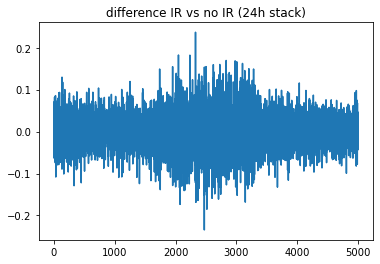

In [9]:

import matplotlib.pyplot as plt
import numpy as np
print(mat['corr_trace'].shape)
#plt.plot(np.sum(mat['corr_data'],axis=0))
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_dailypp/D0-D0.BZG-ESO.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-ESO',channel='HHZ-HHZ', tag='subdivision')
import matplotlib.pyplot as plt
#print(cst[1].stats)
l = []
for tr in cst:
    l.append(tr.data)
noIR_mean = np.sum(l, axis=0)
print(cst[1].stats)
plt.plot(cst[0].data)
plt.plot(A[1,])
#plt.plot(noIR_mean)
#plt.plot(A.sum(axis=0))
#plt.plot((A.sum(axis=0)-noIR_mean))
plt.title('difference IR vs no IR (24h stack)')
#plt.title('Daily Stacks')
#plt.legend(['With IR (old miic)', 'IR removed (new miic)'])
#cst[2].plot()


In [1]:
from miic3.db.asdf_handler import NoiseDB
ndb = NoiseDB('/home/pm/Documents/PhD/testdata/testnb_preprocessed/', 'D0', 'ESO')
st = ndb.get_all_data()
print(st.__str__(extended=True))

306 Trace(s) in Stream:
D0.ESO.00.HHE | 2015-08-01T00:00:00.000000Z - 2015-08-01T01:00:00.000000Z | 25.0 Hz, 90001 samples
D0.ESO.00.HHN | 2015-08-01T00:00:00.000000Z - 2015-08-01T01:00:00.000000Z | 25.0 Hz, 90001 samples
D0.ESO.00.HHZ | 2015-08-01T00:00:00.000000Z - 2015-08-01T01:00:00.000000Z | 25.0 Hz, 90001 samples
D0.ESO.00.HHE | 2015-08-01T01:00:00.000000Z - 2015-08-01T02:00:00.000000Z | 25.0 Hz, 90001 samples
D0.ESO.00.HHN | 2015-08-01T01:00:00.000000Z - 2015-08-01T02:00:00.000000Z | 25.0 Hz, 90001 samples
D0.ESO.00.HHZ | 2015-08-01T01:00:00.000000Z - 2015-08-01T02:00:00.000000Z | 25.0 Hz, 90001 samples
D0.ESO.00.HHE | 2015-08-01T02:00:00.000000Z - 2015-08-01T03:00:00.000000Z | 25.0 Hz, 90001 samples
D0.ESO.00.HHN | 2015-08-01T02:00:00.000000Z - 2015-08-01T03:00:00.000000Z | 25.0 Hz, 90001 samples
D0.ESO.00.HHZ | 2015-08-01T02:00:00.000000Z - 2015-08-01T03:00:00.000000Z | 25.0 Hz, 90001 samples
D0.ESO.00.HHE | 2015-08-01T03:00:00.000000Z - 2015-08-01T04:00:00.000000Z | 25.0 Hz, 

In [3]:
ndb = NoiseDB('/home/pm/Documents/PhD/testdata/testnb_preprocessed_dailypp/', 'D0', 'ESO')
st = ndb.get_all_data().merge()
print(st.__str__(extended=True))

3 Trace(s) in Stream:
D0.ESO.00.HHE | 2015-08-01T00:00:00.000000Z - 2015-08-05T00:00:00.000000Z | 25.0 Hz, 8640001 samples (masked)
D0.ESO.00.HHN | 2015-08-01T00:00:00.000000Z - 2015-08-05T00:00:00.000000Z | 25.0 Hz, 8640001 samples (masked)
D0.ESO.00.HHZ | 2015-08-01T00:00:00.000000Z - 2015-08-05T00:00:00.000000Z | 25.0 Hz, 8640001 samples (masked)
